In [1]:
# M916 - Machine Learning
# Coursework 2
# Student's name: Christina Christodoulou
# I.D Number: LT1200027

In [1]:
#------------------------------------------- Comprehension Questions - Answers ------------------------------------------------

# Question 1: 2. ability to generalize well
# Question 2: 1. classification
# Question 3: 1. supervised learning

In [171]:
#--------------------------------------------------- Implementation ------------------------------------------------------------
# Import necessary libraries
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from scipy import optimize
from matplotlib import pyplot as plt
from scipy import optimize
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [172]:
# Load Heart Disease Dataset in a single dataframe including the target variable
filename = "heart.csv"
dataframe = pd.read_csv(filename,header=0)

In [173]:
# Let's take a look at the dataset in a dataframe 
dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [174]:
# Understand the dataset such as its dimensions, the data types, memory usage, Non-Null Count
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [175]:
# Data Cleaning

# Check to see if there are any missing values
dataframe.isnull().values.any()
# It appears that there aren't any

False

In [176]:
# Check for NaN values
dataframe.isna() 
# It appears that there aren't any

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [177]:
dataframe.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


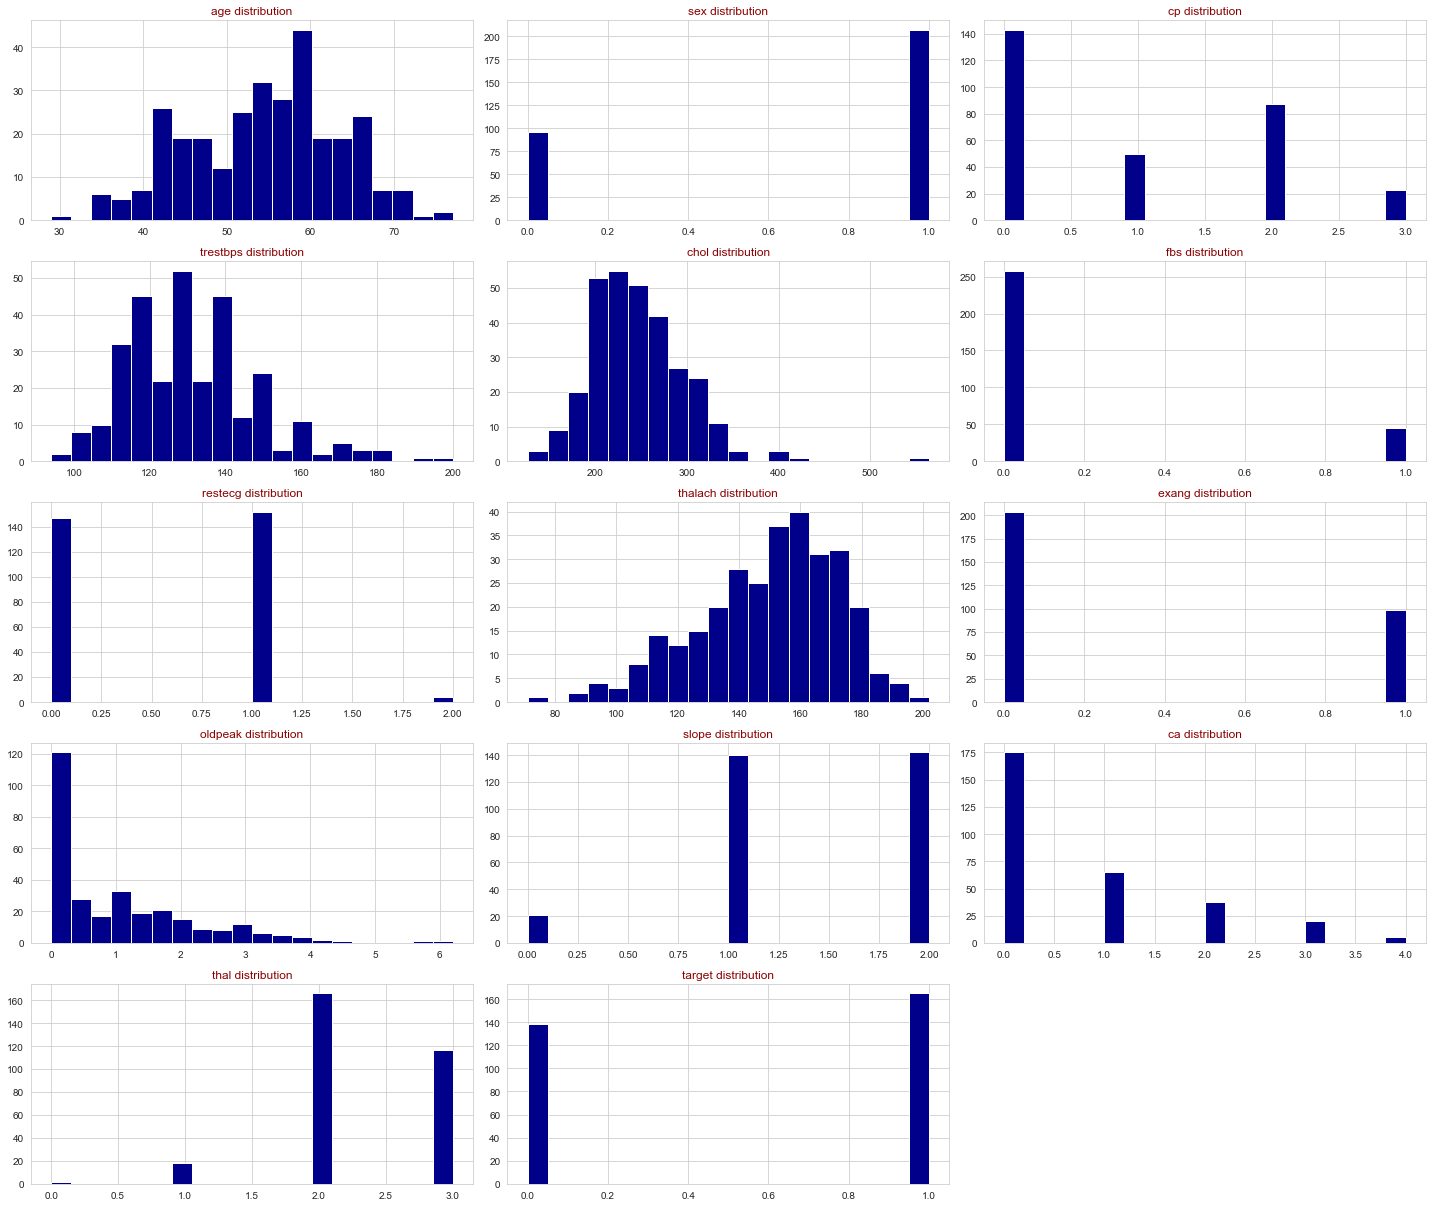

In [178]:
# Plot the histogram of each input and of the target variable

def draw_histograms(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins = 20 ,ax = ax, facecolor = 'darkblue')
        ax.set_title(feature + " distribution", color = 'darkred')
        
    fig.tight_layout()  
    plt.show()
    
draw_histograms(dataframe,dataframe.columns, 6, 3)

In [179]:
# Check the binary values of the target variable

dataframe.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Patients suffering from heart disease: 45.54%
Patients not suffering from heart disease: 54.46%


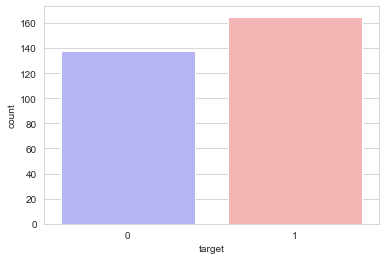

In [180]:
# Draw the plot of the target variable

sns.countplot(x = "target", data = dataframe, palette="bwr")

count_no_disease = len(dataframe[dataframe.target == 0])
count_with_disease = len(dataframe[dataframe.target == 1])

print("Patients suffering from heart disease: {:.2f}%".format((count_no_disease / (len(dataframe.target)) *100)))
print("Patients not suffering from heart disease: {:.2f}%".format((count_with_disease / (len(dataframe.target)) *100)))

"It can be observed that the 'cp' as well as 'thalach' are positively strongly correlated to the target variable. The chest pain and the maximum heart rate achieved contribute the most in prediction of presences of a heart disease. The negative strong correlation is also evident between 'exang', 'oldspeak'and 'ca' and the target variable."

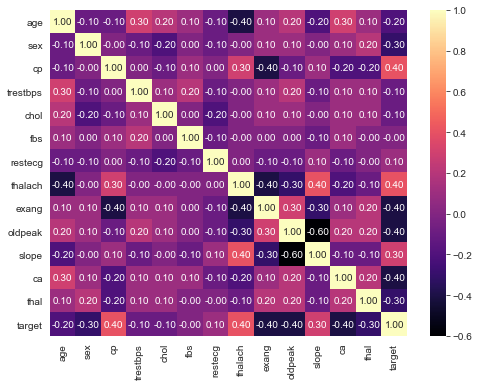

In [181]:
# Plot the correlation matrix of all the variables

correlation_matrix = dataframe.corr().round(1)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap="magma",fmt='.2f')

"It can be observed that the 'cp' as well as 'thalach' are positively strongly correlated to the target variable. The chest pain and the maximum heart rate achieved contribute the most in prediction of presences of a heart disease. The negative strong correlation is also evident between 'exang', 'oldspeak'and 'ca' and the target variable."

In [182]:
# I noticed that there are categorical variables in the dataset
# Convert categorical variable into dummy variables using .get_dummies from pandas - One-Hot Encoding

a = pd.get_dummies(dataframe["sex"], prefix = "sex")
b = pd.get_dummies(dataframe["cp"], prefix = "cp")
c = pd.get_dummies(dataframe["fbs"], prefix = "fbs")
d = pd.get_dummies(dataframe["restecg"], prefix = "restecg")
e = pd.get_dummies(dataframe["exang"],prefix="exang")
f = pd.get_dummies(dataframe["slope"],prefix="slope")
g = pd.get_dummies(dataframe["ca"],prefix="ca")
h = pd.get_dummies(dataframe["thal"], prefix = "thal")

frames = [dataframe, a, b, c, d, e, f, g ,h]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ["sex","cp","fbs","restecg", "exang","slope", "ca","thal"])
print(df.shape)

(303, 31)


In [183]:
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [184]:
#--------------------------------------------------- Prepare dataset -----------------------------------------------------------

# Separate the output from the input values

y = df.target.values  # the target variable
x = df.drop(["target"], axis = 1) # the input variables without the target


# Normalize the input variables

X = (x - np.min(x))/(np.max(x) - np.min(x)).values # scales the data range to [0,1]

In [185]:
# Split the data into train and test sets, 80% training 20% test

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,train_size = 0.8, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 30)
(61, 30)
(242,)
(61,)


In [186]:
#----------------------------------------- Train a logistic regression model (LR) ---------------------------------------------
LR = LogisticRegression()

# Train the model using train set
LR.fit(X_train, Y_train)

print("Number of iterations: {}".format(LR.n_iter_))

# Model evaluation for test set (predicted values of y given the X_test data), Make predictions using the test set
y_test_predict = LR.predict(X_test)

# Model evaluation using the train set (predicted values of y given the X_train data)
y_train_predict = LR.predict(X_train)

# Calculate accuracy of Logistic regression model
LR1_accuracy = metrics.accuracy_score(Y_train,y_train_predict)*100
LR_accuracy = metrics.accuracy_score(Y_test,y_test_predict)*100

print("Accuracy of Logistic Regression model - train set: {}%".format(LR1_accuracy))
print("Accuracy of Logistic Regression model - test set: {}%".format(LR_accuracy))
print()
print("The Beta parameters:", LR.coef_)
print()
print("The Intercept (bias):", LR.intercept_) 

# RMSE and R-squared for train set
r2 = metrics.r2_score(Y_train, y_train_predict)*100
rmse = metrics.mean_squared_error(Y_train, y_train_predict)*100

print()
print("Model performance for train set")
print("-------------------------------")
print("R2 score: {}%".format(r2))
print("RMSE: {}%".format(rmse))

# RMSE and R-squared for test set, 1 is perfect prediction
r_squared = metrics.r2_score(Y_test, y_test_predict)*100
rmse = metrics.mean_squared_error(Y_test, y_test_predict)*100

print()
print("Model performance for test set")
print("-------------------------------")
print("R2 score: {}%".format(r_squared))
print("RMSE: {}%".format(rmse))

Number of iterations: [34]
Accuracy of Logistic Regression model - train set: 86.36363636363636%
Accuracy of Logistic Regression model - test set: 91.80327868852459%

The Beta parameters: [[ 0.05265972 -0.78296953 -0.45695266  0.84608961 -0.84977666  0.58184258
  -0.58185115 -0.95237337 -0.00842345  0.49950628  0.46128196 -0.11568452
   0.11567595 -0.15712864  0.42817846 -0.2710584   0.49259784 -0.49260642
  -0.10536573 -0.46003463  0.56539179  1.23159706 -0.39976851 -1.09966119
  -0.37968922  0.6475133  -0.25968812  0.26192248  0.68420241 -0.68644534]]

The Intercept (bias): [-0.18140308]

Model performance for train set
-------------------------------
R2 score: 44.817578772802655%
RMSE: 13.636363636363635%

Model performance for test set
-------------------------------
R2 score: 67.20430107526882%
RMSE: 8.19672131147541%


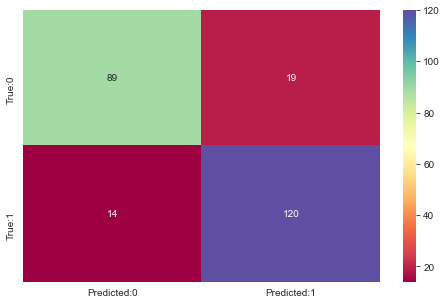

Classification report of LR Confusion matrix - Train set :
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       108
           1       0.86      0.90      0.88       134

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



'The confusion matrix shows that 120 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, the prediction was CORRECT (True-Positive). 89 patients were predicted that they will not suffer from heart diseases, the prediction was CORRECT (True-Negative). 19 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, but the prediction was WRONG (False-Positive). 14 patients were predicted that they will not suffer from heart diseases, but the prediction was WRONG (False-Negative). The classification report of the model shows that 86% prediction concerning more chance of heart attack (1) was predicted correctly and 86% concerning less chance of heart attack (0) was predicted correctly.'

In [187]:
# Create confusion matrix of LR - train set

CM_LR1 = confusion_matrix(Y_train,y_train_predict)

# Visualize the confusion matrix

conf_matrix = pd.DataFrame(data = CM_LR1, columns = ["Predicted:0", "Predicted:1"], index =["True:0", "True:1"])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Spectral")
plt.show()

# Get the classificatin report from the confusion matrix

print("Classification report of LR Confusion matrix - Train set :\n",classification_report(Y_train,y_train_predict))

"The confusion matrix shows that 120 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, the prediction was CORRECT (True-Positive). 89 patients were predicted that they will not suffer from heart diseases, the prediction was CORRECT (True-Negative). 19 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, but the prediction was WRONG (False-Positive). 14 patients were predicted that they will not suffer from heart diseases, but the prediction was WRONG (False-Negative). The classification report of the model shows that 86% prediction concerning more chance of heart attack (1) was predicted correctly and 86% concerning less chance of heart attack (0) was predicted correctly."

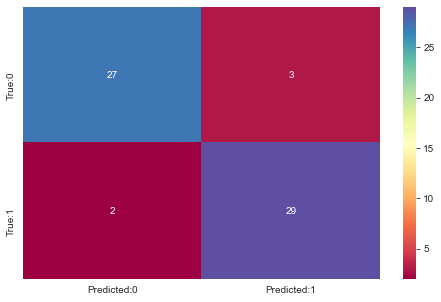

Classification report of LR  Confusion matrix - Test set:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.91      0.94      0.92        31

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



'The confusion matrix shows that 29 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, the prediction was CORRECT (True-Positive). 27 patients were predicted that they will not suffer from heart diseases, the prediction was CORRECT (True-Negative). 3 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, but the prediction was WRONG (False-Positive). 2 patients were predicted that they will not suffer from heart diseases, but the prediction was WRONG (False-Negative). The classification report of the model shows that 91% prediction concerning more chance of heart attack (1) was predicted correctly and 93% concerning less chance of heart attack (0) was predicted correctly.'

In [188]:
# Create confusion matrix of LR - test set

CM_LR = confusion_matrix(Y_test,y_test_predict)

# Visualize the confusion matrix

conf_matrix = pd.DataFrame(data = CM_LR, columns = ["Predicted:0", "Predicted:1"], index =["True:0", "True:1"])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Spectral")
plt.show()

# Get the classificatin report from the confusion matrix

print("Classification report of LR  Confusion matrix - Test set:\n",classification_report(Y_test,y_test_predict))

"The confusion matrix shows that 29 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, the prediction was CORRECT (True-Positive). 27 patients were predicted that they will not suffer from heart diseases, the prediction was CORRECT (True-Negative). 3 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, but the prediction was WRONG (False-Positive). 2 patients were predicted that they will not suffer from heart diseases, but the prediction was WRONG (False-Negative). The classification report of the model shows that 91% prediction concerning more chance of heart attack (1) was predicted correctly and 93% concerning less chance of heart attack (0) was predicted correctly."

In [189]:
# Only for the test set

TN = CM_LR[0,0] # True Negative
TP = CM_LR[1,1] # True Positive
FN = CM_LR[1,0] # False Negative
FP = CM_LR[0,1] # False Positive

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)

print("Sensitivity:", TP / float(TP + FN)*100) # Calculate TP/(TP+FN), true positive rate
print()
print("Specificity:",TN / float(TN + FP)*100) # Calculate TN/(TN+FP), true negative rate
print()
print("Positive Predictive Value:",TP / float(TP + FP)*100) # Calculate TP/(TP+FP)
print()
print("Negative Predictive Value:",TN / float(TN + FN)*100) # Calculate TN/(TN+FN)
print()

"It is evident that the logistic regression model is more sensitive than specific. It means that the model is able to identify the 93% of the patients who suffer from heart diseases and the 90% of the patients who do not. The high Positive Predictive Value can tell the patient the odds of having a heart disease in case of a positive result, while the even higher Negative Predictive value can surely tell the patient that the negative test result is accurate."

Sensitivity: 93.54838709677419

Specificity: 90.0

Positive Predictive Value: 90.625

Negative Predictive Value: 93.10344827586206



'It is evident that the logistic regression model is more sensitive than specific. It means that the model is able to identify the 93% of the patients who suffer from heart diseases and the 90% of the patients who do not. The high Positive Predictive Value can tell the patient the odds of having a heart disease in case of a positive result, while the even higher Negative Predictive value can surely tell the patient that the negative test result is accurate.'

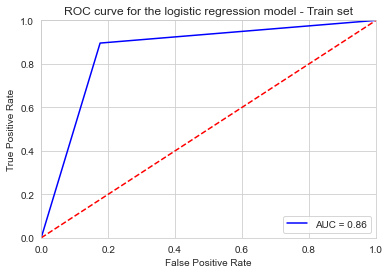

Accuracy of the ROC curve: 85.97982310668878


In [190]:
# Plot ROC curve to visualize the performance of the LR model - train sets

fpr, tpr, thresholds = roc_curve(Y_train,y_train_predict)
roc_auc = auc(fpr, tpr)

plt.title('ROC curve for the logistic regression model - Train set')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy of the ROC curve:",metrics.roc_auc_score(Y_train,y_train_predict)*100)

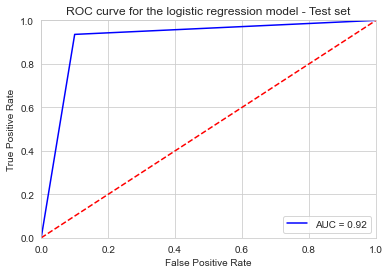

Accuracy of the ROC curve: 91.77419354838709


In [191]:
# Plot ROC curve to visualize the performance of the LR model - test sets

fpr, tpr, thresholds = roc_curve(Y_test, y_test_predict)
roc_auc = auc(fpr, tpr)

plt.title('ROC curve for the logistic regression model - Test set')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy of the ROC curve:",metrics.roc_auc_score(Y_test,y_test_predict)*100)

In [131]:
#------------------------------------- Train a Support Vector Machine Classifier (SVM) ----------------------------------------

#------ Linear function kernel ------

# C = 1
svclassifier_1 = SVC(C= 1.0, kernel="linear", gamma= "auto")

svclassifier_1.fit(X_train, Y_train)

y_tr1 = svclassifier_1.predict(X_train)
y_pred_1 = svclassifier_1.predict(X_test)

SVM_accuracy_train1 = metrics.accuracy_score(Y_train, y_tr1)*100
SVM_accuracy_1 = metrics.accuracy_score(Y_test, y_pred_1)*100

print("Accuracy of SVM with linear kernel and C = 1 - train set: {}% ".format(SVM_accuracy_train1))
print("Accuracy of SVM with linear kernel and C = 1 - test set: {}% ".format(SVM_accuracy_1))
print("Confusion matrix of SVM with linear kernel and C = 1:\n", confusion_matrix(Y_test,y_pred_1))

# C = 10
svclassifier_2 = SVC(C= 10.0, kernel="linear", gamma= "auto")

svclassifier_2.fit(X_train, Y_train)

y_tr2 = svclassifier_2.predict(X_train)
y_pred_2 = svclassifier_2.predict(X_test)

SVM_accuracy_train2 = metrics.accuracy_score(Y_train, y_tr2)*100
SVM_accuracy_2 = metrics.accuracy_score(Y_test, y_pred_2)*100

print("Accuracy of SVM with linear kernel and C = 1 - train set: {}% ".format(SVM_accuracy_train2))
print("Accuracy of SVM with linear kernel and C = 10 - test set: {}% ".format(SVM_accuracy_2))
print("Confusion matrix of SVM with linear kernel and C = 10:\n", confusion_matrix(Y_test,y_pred_2))

# C = 20
svclassifier_3 = SVC(C= 20.0, kernel="linear", gamma= "auto")

svclassifier_3.fit(X_train, Y_train)

y_tr3 = svclassifier_3.predict(X_train)
y_pred_3 = svclassifier_3.predict(X_test)

SVM_accuracy_train3 = metrics.accuracy_score(Y_train, y_tr3)*100
SVM_accuracy_3 = metrics.accuracy_score(Y_test, y_pred_3)*100

print("Accuracy of SVM with linear kernel and C = 20 - train set: {}% ".format(SVM_accuracy_train3))
print("Accuracy of SVM with linear kernel and C = 20 - test set: {}% ".format(SVM_accuracy_3))
print("Confusion matrix of SVM with linear kernel and C = 20:\n" ,confusion_matrix(Y_test,y_pred_3))

#------ Radial basis function kernel ------

# C = 1
svclassifier1 = SVC(C= 1.0, kernel="rbf", gamma= "auto")

svclassifier1.fit(X_train, Y_train)

y_tra1 = svclassifier1.predict(X_train)
y_pred1 = svclassifier1.predict(X_test)

SVM_accuracy01 = metrics.accuracy_score(Y_train, y_tra1)*100
SVM_accuracy1 = metrics.accuracy_score(Y_test, y_pred1)*100

print("Accuracy of SVM with RBF kernel and C = 1 - train set: {}% ".format(SVM_accuracy01))
print("Accuracy of SVM with RBF kernel and C = 1 - test set: {}% ".format(SVM_accuracy1))
print("Confusion matrix of SVM with RBF kernel and C = 1:\n" ,confusion_matrix(Y_test,y_pred1))

# C = 10
svclassifier2 = SVC(C= 10.0, kernel="rbf", gamma= "auto")

svclassifier2.fit(X_train, Y_train)

y_tra2 = svclassifier1.predict(X_train)
y_pred2 = svclassifier2.predict(X_test)

SVM_accuracy02 = metrics.accuracy_score(Y_train, y_tra2)*100 
SVM_accuracy2 = metrics.accuracy_score(Y_test, y_pred2)*100

print("Accuracy of SVM with RBF kernel and C = 10 - train set: {}% ".format(SVM_accuracy02))
print("Accuracy of SVM with RBF kernel and C = 10 - test set: {}% ".format(SVM_accuracy2))
print("Confusion matrix of SVM with RBF kernel and C = 10\n" ,confusion_matrix(Y_test,y_pred2))

# C = 20
svclassifier3 = SVC(C= 20.0, kernel="rbf", gamma= "auto")

svclassifier3.fit(X_train, Y_train)

y_tra3 = svclassifier1.predict(X_train)
y_pred3 = svclassifier3.predict(X_test)

SVM_accuracy03 = metrics.accuracy_score(Y_train, y_tra3)*100 
SVM_accuracy3 = metrics.accuracy_score(Y_test, y_pred3)*100

print("Accuracy of SVM with RBF kernel and C = 20 - train set: {}% ".format(SVM_accuracy03))
print("Accuracy of SVM with RBF kernel and C = 20 - test set: {}% ".format(SVM_accuracy3))
print("Confusion matrix of SVM with RBF kernel and C = 20\n" ,confusion_matrix(Y_test,y_pred3))

Accuracy of SVM with linear kernel and C = 1 - train set: 86.77685950413223% 
Accuracy of SVM with linear kernel and C = 1 - test set: 90.1639344262295% 
Confusion matrix of SVM with linear kernel and C = 1:
 [[26  4]
 [ 2 29]]
Accuracy of SVM with linear kernel and C = 1 - train set: 87.19008264462809% 
Accuracy of SVM with linear kernel and C = 10 - test set: 86.88524590163934% 
Confusion matrix of SVM with linear kernel and C = 10:
 [[26  4]
 [ 4 27]]
Accuracy of SVM with linear kernel and C = 20 - train set: 87.19008264462809% 
Accuracy of SVM with linear kernel and C = 20 - test set: 85.24590163934425% 
Confusion matrix of SVM with linear kernel and C = 20:
 [[25  5]
 [ 4 27]]
Accuracy of SVM with RBF kernel and C = 1 - train set: 85.53719008264463% 
Accuracy of SVM with RBF kernel and C = 1 - test set: 85.24590163934425% 
Confusion matrix of SVM with RBF kernel and C = 1:
 [[25  5]
 [ 4 27]]
Accuracy of SVM with RBF kernel and C = 10 - train set: 85.53719008264463% 
Accuracy of S

In [132]:
# Find the best C parameter and kernel for the SVM using GridSearchCV

param_grid = {"C":[1,10,20], "kernel":["linear","rbf"]}

grid = GridSearchCV(param_grid= param_grid, estimator= SVC(probability= True), scoring="f1", refit= True, verbose=1)

grid.fit(X_train, Y_train)

grid.best_params_

# It seems that the best option is the Radial Basis kernel with C = 1

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'C': 1, 'kernel': 'rbf'}

In [133]:
# Model evaluation using the train set (predicted values of y given the X_train data)
Y_tr = grid.predict(X_train)

# Model evaluation using the test set
Y_pred = grid.predict(X_test)

SVM1_accuracy = metrics.accuracy_score(Y_train, Y_tr)*100
SVM_accuracy = metrics.accuracy_score(Y_test, Y_pred)*100

print("Accuracy of optimum SVM - Train set: {}%".format(SVM1_accuracy))
print("Accuracy of optimum SVM - Test set: {}%".format(SVM_accuracy))

# RMSE and R-squared for train set
r2 = metrics.r2_score(Y_train, Y_tr)*100
rmse = metrics.mean_squared_error(Y_train, Y_tr)*100

print()
print("Model performance for train set")
print("-------------------------------")
print("R2 score: {}%".format(r2))
print("RMSE: {}%".format(rmse))

# RMSE and R-squared for test set, 1 is perfect prediction
r_squared = metrics.r2_score(Y_test, Y_pred)*100
rmse = metrics.mean_squared_error(Y_test, Y_pred)*100

print()
print("Model performance for test set")
print("-------------------------------")
print("R2 score: {}%".format(r_squared))
print("RMSE: {}%".format(rmse))

Accuracy of optimum SVM - Train set: 90.9090909090909%
Accuracy of optimum SVM - Test set: 90.1639344262295%

Model performance for train set
-------------------------------
R2 score: 63.21171918186843%
RMSE: 9.090909090909092%

Model performance for test set
-------------------------------
R2 score: 60.64516129032258%
RMSE: 9.836065573770492%


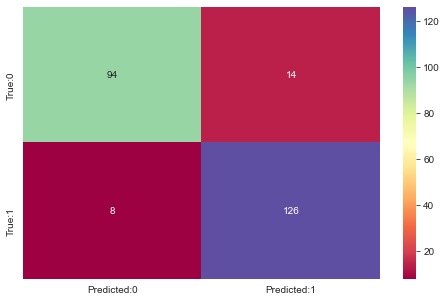

Classification report of SVM Confusion matrix - Train set:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90       108
           1       0.90      0.94      0.92       134

    accuracy                           0.91       242
   macro avg       0.91      0.91      0.91       242
weighted avg       0.91      0.91      0.91       242



'The confusion matrix show that 126 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, the prediction was CORRECT (True-Positive). 94 patients were predicted that they will not suffer from heart diseases, the prediction was CORRECT (True-Negative). 14 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, but the prediction was WRONG (False-Positive). 8 patients were predicted that they will not suffer from heart diseases, but the prediction was WRONG (False-Negative).The classification report of the model shows that 90% prediction concerning more chance of heart attack (1) was predicted correctly and 92% concerning less chance of heart attack (0) was predicted correctly.'

In [192]:
# Create confusion matrix of optimum SVM - Train set

CM_SVM1 = confusion_matrix(Y_train, Y_tr)

# Visualize the confusion matrix

conf_matrix = pd.DataFrame(data = CM_SVM1, columns = ["Predicted:0", "Predicted:1"], index =["True:0", "True:1"])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Spectral")
plt.show()

# Get the classificatin report from the confusion matrix

print("Classification report of SVM Confusion matrix - Train set:\n",classification_report(Y_train, Y_tr))

"The confusion matrix show that 126 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, the prediction was CORRECT (True-Positive). 94 patients were predicted that they will not suffer from heart diseases, the prediction was CORRECT (True-Negative). 14 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, but the prediction was WRONG (False-Positive). 8 patients were predicted that they will not suffer from heart diseases, but the prediction was WRONG (False-Negative).The classification report of the model shows that 90% prediction concerning more chance of heart attack (1) was predicted correctly and 92% concerning less chance of heart attack (0) was predicted correctly."

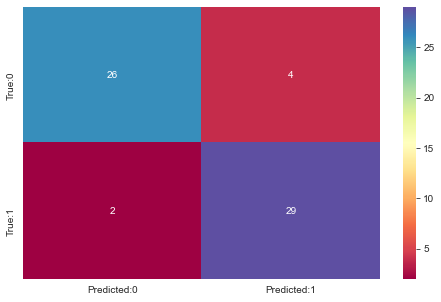

Classification report of SVM Confusion matrix - Test set:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.88      0.94      0.91        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



'The confusion matrix show that 29 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, the prediction was CORRECT (True-Positive). 26 patients were predicted that they will not suffer from heart diseases, the prediction was CORRECT (True-Negative). 4 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, but the prediction was WRONG (False-Positive). 2 patients were predicted that they will not suffer from heart diseases, but the prediction was WRONG (False-Negative).The classification report of the model shows that 88% prediction concerning more chance of heart attack (1) was predicted correctly and 93% concerning less chance of heart attack (0) was predicted correctly.'

In [193]:
# Create confusion matrix of optimum SVM - Test set

CM_SVM = confusion_matrix(Y_test,Y_pred)

# Visualize the confusion matrix

conf_matrix = pd.DataFrame(data = CM_SVM, columns = ["Predicted:0", "Predicted:1"], index =["True:0", "True:1"])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Spectral")
plt.show()

# Get the classificatin report from the confusion matrix

print("Classification report of SVM Confusion matrix - Test set:\n",classification_report(Y_test,Y_pred))

"The confusion matrix show that 29 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, the prediction was CORRECT (True-Positive). 26 patients were predicted that they will not suffer from heart diseases, the prediction was CORRECT (True-Negative). 4 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, but the prediction was WRONG (False-Positive). 2 patients were predicted that they will not suffer from heart diseases, but the prediction was WRONG (False-Negative).The classification report of the model shows that 88% prediction concerning more chance of heart attack (1) was predicted correctly and 93% concerning less chance of heart attack (0) was predicted correctly."

In [194]:
# Only for the test sets of the optimum SVM

TN = CM_SVM[0,0] # True Negative
TP = CM_SVM[1,1] # True Positive
FN = CM_SVM[1,0] # False Negative
FP = CM_SVM[0,1] # False Positive

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)

print("Sensitivity:", TP / float(TP + FN)*100) # Calculate TP/(TP+FN), true positive rate
print()
print("Specificity:",TN / float(TN + FP)*100) # Calculate TN/(TN+FP), true negative rate
print()
print("Positive Predictive Value:",TP / float(TP + FP)*100) # Calculate TP/(TP+FP)
print()
print("Negative Predictive Value:",TN / float(TN + FN)*100) # Calculate TN/(TN+FN)
print()

"It is evident that the Support Vector Machine classifier is more sensitive than specific.It means that the model is able to identify the 93.5% of the patients who suffer from heart diseases and the 86.6% of the patients who do not. The high Positive Predictive Value can provide satisfactory results that the patient has a heart disease in case of a positive result, whereas the higher Negative Predictive Value can surely tell the 92.8% probability that the patient does not have the disease."

Sensitivity: 93.54838709677419

Specificity: 86.66666666666667

Positive Predictive Value: 87.87878787878788

Negative Predictive Value: 92.85714285714286



'It is evident that the Support Vector Machine classifier is more sensitive than specific.It means that the model is able to identify the 93.5% of the patients who suffer from heart diseases and the 86.6% of the patients who do not. The high Positive Predictive Value can provide satisfactory results that the patient has a heart disease in case of a positive result, whereas the higher Negative Predictive Value can surely tell the 92.8% probability that the patient does not have the disease.'

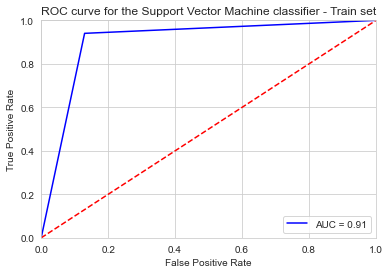

Accuracy of the ROC curve: 90.53344389165284


In [195]:
# Plot ROC curve to visualize the performance of the SVM classifier - Train set

fpr, tpr, thresholds = roc_curve(Y_train, Y_tr)
roc_auc = auc(fpr, tpr)

plt.title('ROC curve for the Support Vector Machine classifier - Train set')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy of the ROC curve:",metrics.roc_auc_score(Y_train, Y_tr)*100)

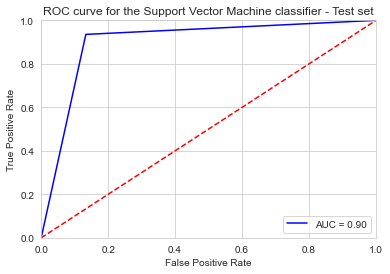

Accuracy of the ROC curve: 90.10752688172043


In [196]:
# Plot ROC curve to visualize the performance of the SVM classifier - Test set

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC curve for the Support Vector Machine classifier - Test set')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy of the ROC curve:",metrics.roc_auc_score(Y_test,Y_pred)*100)

In [197]:
#------------------------------------------ Train a Naive Bayes Classifier (NB) -----------------------------------------------

NB = GaussianNB()

# Train the model using train set
NB.fit(X_train, Y_train)

# Make predictions using the test set
y_pred = NB.predict(X_test)

# Model evaluation using the train set (predicted values of y given the X_train data)
y_tr = NB.predict(X_train)

# Calculate accuracy of Naive Bayes Classifier
NB1_accuracy = metrics.accuracy_score(Y_train,y_tr)*100
NB_accuracy = metrics.accuracy_score(Y_test,y_pred)*100

print("Accuracy of Naive Bayes classifier - train set: {}% ".format(NB1_accuracy))
print("Accuracy of Naive Bayes classifier - test set: {}% ".format(NB_accuracy))

# RMSE and R-squared for train set
r2 = metrics.r2_score(Y_train, y_tr)*100
rmse = metrics.mean_squared_error(Y_train, y_tr)*100

print()
print("Model performance for train set")
print("-------------------------------")
print("R2 score: {}%".format(r2))
print("RMSE: {}%".format(rmse))

# RMSE and R-squared for test set, 1 is perfect prediction
r_squared = metrics.r2_score(Y_test, y_pred)*100
rmse = metrics.mean_squared_error(Y_test, y_pred)*100

print()
print("Model performance for test set")
print("-------------------------------")
print("R2 score: {}%".format(r_squared))
print("RMSE: {}%".format(rmse))

Accuracy of Naive Bayes classifier - train set: 80.16528925619835% 
Accuracy of Naive Bayes classifier - test set: 83.60655737704919% 

Model performance for train set
-------------------------------
R2 score: 19.734660033167494%
RMSE: 19.834710743801654%

Model performance for test set
-------------------------------
R2 score: 34.408602150537625%
RMSE: 16.39344262295082%


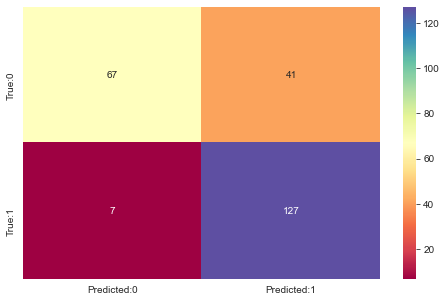

Classification report of NB Confusion matrix - Train set:
               precision    recall  f1-score   support

           0       0.91      0.62      0.74       108
           1       0.76      0.95      0.84       134

    accuracy                           0.80       242
   macro avg       0.83      0.78      0.79       242
weighted avg       0.82      0.80      0.79       242



'The confusion matrix shows that 127 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, the prediction was CORRECT (True-Positive). 67 patients were predicted that they will not suffer from heart diseases, the prediction was CORRECT (True-Negative). 41 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, but the prediction was WRONG (False-Positive). 7 patients were predicted that they will not suffer from heart diseases, but the prediction was WRONG (False-Negative).The classification report of the model shows that 76% prediction concerning more chance of heart attack (1) was predicted correctly and 91% concerning less chance of heart attack (0) was predicted correctly.'

In [198]:
# Create confusion matrix of NB - train set

CM_NB1 = confusion_matrix(Y_train, y_tr)

# Visualize the confusion matrix

conf_matrix = pd.DataFrame(data = CM_NB1, columns = ["Predicted:0", "Predicted:1"], index =["True:0", "True:1"])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Spectral")
plt.show()

# Get the classificatin report from the confusion matrix

print("Classification report of NB Confusion matrix - Train set:\n",classification_report(Y_train, y_tr))

"The confusion matrix shows that 127 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, the prediction was CORRECT (True-Positive). 67 patients were predicted that they will not suffer from heart diseases, the prediction was CORRECT (True-Negative). 41 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, but the prediction was WRONG (False-Positive). 7 patients were predicted that they will not suffer from heart diseases, but the prediction was WRONG (False-Negative).The classification report of the model shows that 76% prediction concerning more chance of heart attack (1) was predicted correctly and 91% concerning less chance of heart attack (0) was predicted correctly."

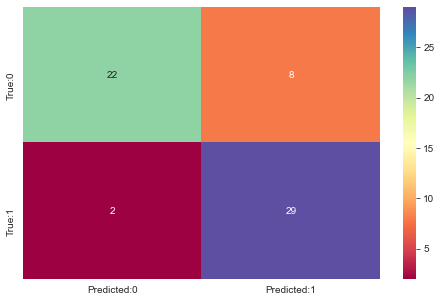

Classification report of NB Confusion matrix - Test set:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.78      0.94      0.85        31

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



'The confusion matrix shows that 29 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, the prediction was CORRECT (True-Positive). 22 patients were predicted that they will not suffer from heart diseases, the prediction was CORRECT (True-Negative). 8 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, but the prediction was WRONG (False-Positive). 2 patients were predicted that they will not suffer from heart diseases, but the prediction was WRONG (False-Negative).The classification report of the model shows that 78% prediction concerning more chance of heart attack (1) was predicted correctly and 92% concerning less chance of heart attack (0) was predicted correctly.'

In [199]:
# Create confusion matrix of NB - test set

CM_NB = confusion_matrix(Y_test,y_pred)

# Visualize the confusion matrix

conf_matrix = pd.DataFrame(data = CM_NB, columns = ["Predicted:0", "Predicted:1"], index =["True:0", "True:1"])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Spectral")
plt.show()

# Get the classificatin report from the confusion matrix

print("Classification report of NB Confusion matrix - Test set:\n",classification_report(Y_test,y_pred))

"The confusion matrix shows that 29 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, the prediction was CORRECT (True-Positive). 22 patients were predicted that they will not suffer from heart diseases, the prediction was CORRECT (True-Negative). 8 patients were predicted that they will suffer from heart diseases and are likely to have heart attack, but the prediction was WRONG (False-Positive). 2 patients were predicted that they will not suffer from heart diseases, but the prediction was WRONG (False-Negative).The classification report of the model shows that 78% prediction concerning more chance of heart attack (1) was predicted correctly and 92% concerning less chance of heart attack (0) was predicted correctly."

In [200]:
# Only for the test sets of Naive Bayes classifier

TN = CM_NB[0,0] # True Negative
TP = CM_NB[1,1] # True Positive
FN = CM_NB[1,0] # False Negative
FP = CM_NB[0,1] # False Positive

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)

print("Sensitivity:", TP / float(TP + FN)*100) # Calculate TP/(TP+FN), true positive rate
print()
print("Specificity:",TN / float(TN + FP)*100) # Calculate TN/(TN+FP), true negative rate
print()
print("Positive Predictive Value:",TP / float(TP + FP)*100) # Calculate TP/(TP+FP)
print()
print("Negative Predictive Value:",TN / float(TN + FN)*100) # Calculate TN/(TN+FN)
print()

"It is evident that the Naive Bayes classifier is much more sensitive than specific. It means that the model is able to identify the 93.5% of the patients who suffer from heart diseases, but the 73.3% of the patients who do not. The Positive Predictive Value is somewhat satisfactory to tell the patient the odds of having a heart disease in case of a positive result, while the much higher Negative Predictive value can surely tell the patient that the negative test result is accurate."

Sensitivity: 93.54838709677419

Specificity: 73.33333333333333

Positive Predictive Value: 78.37837837837837

Negative Predictive Value: 91.66666666666666



'It is evident that the Naive Bayes classifier is much more sensitive than specific. It means that the model is able to identify the 93.5% of the patients who suffer from heart diseases, but the 73.3% of the patients who do not. The Positive Predictive Value is somewhat satisfactory to tell the patient the odds of having a heart disease in case of a positive result, while the much higher Negative Predictive value can surely tell the patient that the negative test result is accurate.'

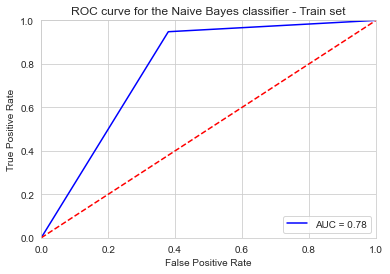

Accuracy of the ROC curve: 78.40657822001104


In [201]:
# Plot ROC curve to visualize the performance of the Naive Bayes classifier - Train set

fpr, tpr, thresholds = roc_curve(Y_train, y_tr)
roc_auc = auc(fpr, tpr)

plt.title('ROC curve for the Naive Bayes classifier - Train set')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy of the ROC curve:",metrics.roc_auc_score(Y_train, y_tr)*100)

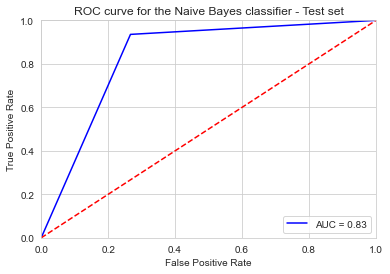

Accuracy of the ROC curve: 83.44086021505377


In [202]:
# Plot ROC curve to visualize the performance of the Naive Bayes classifier - Test set

fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC curve for the Naive Bayes classifier - Test set')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy of the ROC curve:",metrics.roc_auc_score(Y_test,y_pred)*100)

In [203]:
# View once again the confusion matrix and classification report of each classifier to compare the models and reach conclusions
# Logistic Regression Model
CM_LR = confusion_matrix(Y_test,y_test_predict)
print(pd.crosstab(Y_test, y_test_predict, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print()
print("Classification report of LR  Confusion matrix - Test set:\n",classification_report(Y_test,y_test_predict))

Predicted   0   1  All
Actual                
0          27   3   30
1           2  29   31
All        29  32   61

Classification report of LR  Confusion matrix - Test set:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.91      0.94      0.92        31

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [204]:
# Support Vector Machine Classifier
CM_SVM = confusion_matrix(Y_test,Y_pred)
print(pd.crosstab(Y_test,Y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print()
print("Classification report of SVM Confusion matrix - Test set:\n",classification_report(Y_test,Y_pred))

Predicted   0   1  All
Actual                
0          26   4   30
1           2  29   31
All        28  33   61

Classification report of SVM Confusion matrix - Test set:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.88      0.94      0.91        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [205]:
# Naive Bayes Classifier
CM_NB = confusion_matrix(Y_test,y_pred)
print(pd.crosstab(Y_test,y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print()
print("Classification report of NB Confusion matrix - Test set:\n",classification_report(Y_test,y_pred))

Predicted   0   1  All
Actual                
0          22   8   30
1           2  29   31
All        24  37   61

Classification report of NB Confusion matrix - Test set:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.78      0.94      0.85        31

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [206]:
"About the confusion matrices: The actual values of the test set are:The patients who actually don’t have a heart disease = 30.The patients who actually have a heart disease = 31. Predicted values of Logistic Regression Matrix:The number of patients who were predicted as not having a heart disease = 29/30.The number of patients who were predicted as having a heart disease = 32/31. Predicted values of Support Vector Machine Matrix:The number of patients who were predicted as not having a heart disease = 28/30.The number of patients who were predicted as having a heart disease = 33/31. Predicted values of Naive Bayes Matrix:The number of patients who were predicted as not having a heart disease = 24/30. The number of patients who were predicted as having a heart disease = 37/31."

'About the confusion matrices: The actual values of the test set are:The patients who actually don’t have a heart disease = 30.The patients who actually have a heart disease = 31. Predicted values of Logistic Regression Matrix:The number of patients who were predicted as not having a heart disease = 29/30.The number of patients who were predicted as having a heart disease = 32/31. Predicted values of Support Vector Machine Matrix:The number of patients who were predicted as not having a heart disease = 28/30.The number of patients who were predicted as having a heart disease = 33/31. Predicted values of Naive Bayes Matrix:The number of patients who were predicted as not having a heart disease = 24/30. The number of patients who were predicted as having a heart disease = 37/31.'

In [207]:
"About the classification reports: The precision is the measure of patients that are correctly identified as having a heart disease out of all the patients actually having it.The Logistic Regression model achieves the highest precision with 91%, the SVM classifier follows (88%) with the Naive Bayes classifier achieving the lowest(78%). The recall for correctly identifying a patient who actually has a heart disease is the same for all classifiers and is very high (94%). For the heart dataset, achieving a high recall is more important than achieving a high precision as it is vital to detect as many patients suffering from heart diseases as possible. But a high precision is also essential when it comes to health problems, since a patient can suffer from a heart disease and another ailment as well. Thus, a high F1-score would both indicate good precision and recall. The Logistic Regression model achieves once more the highest f1-score (92%), second the SVM classifier (91%) and last comes the Naive Bayes classifier (85%)."

'About the classification reports: The precision is the measure of patients that are correctly identified as having a heart disease out of all the patients actually having it.The Logistic Regression model achieves the highest precision with 91%, the SVM classifier follows (88%) with the Naive Bayes classifier achieving the lowest(78%). The recall for correctly identifying a patient who actually has a heart disease is the same for all classifiers and is very high (94%). For the heart dataset, achieving a high recall is more important than achieving a high precision as it is vital to detect as many patients suffering from heart diseases as possible. But a high precision is also essential when it comes to health problems, since a patient can suffer from a heart disease and another ailment as well. Thus, a high F1-score would both indicate good precision and recall. The Logistic Regression model achieves once more the highest f1-score (92%), second the SVM classifier (91%) and last comes t

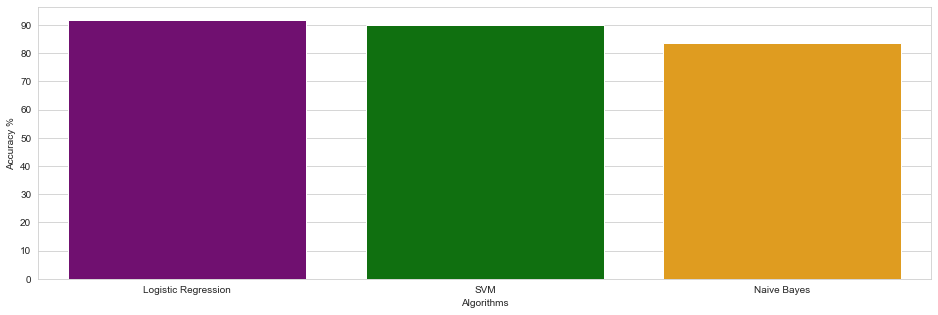

In [208]:
# Plot the accuracy of the three classifiers for the test sets

methods = ["Logistic Regression", "SVM", "Naive Bayes"]
accuracy = [LR_accuracy, SVM_accuracy, NB_accuracy]
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x = methods, y = accuracy, palette = colors)
plt.show()

In [169]:
"Despite the fact that the same ratio was allocated to the train and the test sets for the Logistic Regression, Support Vector Machine and Naive Bayes classifiers, it is evident that the three algorithms behave differently and produce different accuracy scores. The Logistic Regression model had  the  best performance and obtained  better  results  for almost all metrics. It achieved greater accuracy than the other two for the test set (91.80327868852459%). It  is  clear that the Naive Bayes classifier had  the  worst performance  among  the  algorithms with accuracy 83.60655737704919% for the test set, while the SVM achieved 90.1639344262295%. This does not mean that one algorithm is consistently better than the other ones. Even though the logistic regression algorithm performs better than the others in the specific dataset, their model performances are typically affected by the hyperparameters and depend on the case. Several hyperparameters and regularization strategies, like the C softening parameter in the SVM model, can be tuned in different ways within each of these algorithms in order to achieve better accuracy. The SVM model was extended by using linear and Radial Basis function kernels and the optimum parameters were found, transforming  the dataset into a rich features space, which could be improved perhaps with more training data." 

'Despite the fact that the same ratio was allocated to the train and the test sets for the Logistic Regression, Support Vector Machine and Naive Bayes classifiers, it is evident that the three algorithms behave differently and produce different accuracy scores. The Logistic Regression model had  the  best performance and obtained  better  results  for almost all metrics. It achieved greater accuracy than the other two for the test set (91.80327868852459%). It  is  clear that the Naive Bayes classifier had  the  worst performance  among  the  algorithms with accuracy 83.60655737704919% for the test set, while the SVM achieved 90.1639344262295%. This does not mean that one algorithm is consistently better than the other ones. Even though the logistic regression algorithm performs better than the others in the specific dataset, their model performances are typically affected by the hyperparameters and depend on the case. Several hyperparameters and regularization strategies, like the C so